In [1]:
import scipy.integrate as intg
import scipy.interpolate as inp
from scipy.misc import derivative

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyval

In [2]:
import math
from CoolProp.CoolProp import PropsSI

# **function for general use**

In [3]:
def molal_to_massfr(m):
    M_mgcl2 = 95.211    
    x = m*M_mgcl2/1000 / (m*M_mgcl2/1000 + 1 )
    return x

In [4]:
def massfr_to_molal(x):
    M_mgcl2 = 95.211
    m = x/(95.211/1000) / (1-x)
    return m

In [5]:
# relative mean square root error
def RMSRE(ref, sim):
    ref, sim = np.array(ref), np.array(sim)
    result = np.sqrt((((ref - sim)/ref) ** 2).mean())
    return result

# **I. other properties**

### 1. Soluability (Reference: B.S.Krumgalz,  J. Phys. Chem. Ref. Data 46, 043101 (2017))

In [6]:
# temperature range: -5 to 117,2 °C, MgCl2-6H2O

param_soluability = [5.543, 1.834*(10**-2), -6.093*10**-4, 1.858*10**-5, -2.124*10**-7, 8.969*10**-10]

In [7]:
# a function of Temperature(°C), output is molality (mol/kg)
mgcl2_soluability = lambda t: polyval(t, param_soluability)
# attaintion: np.polynominal.polynominal.polyval is different from the numpy.polyval

In [8]:
molal_to_massfr(mgcl2_soluability(25))

0.35721354288574775

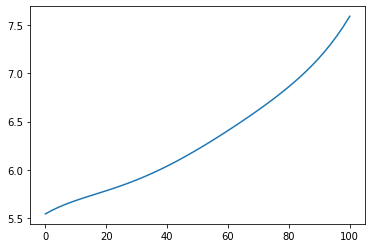

In [9]:
T = np.linspace(0, 100, num = 50, endpoint = True)
plt.plot(T, mgcl2_soluability(T))

### 2. Vapour pressure (Koller)

### 3. Density (Koller)

In [10]:
PropsSI('D','T',293.15,'Q',0, 'IF97::Water')

998.1608092787944

In [11]:
dw_coeff= [1.9937718430, 1.0985211604, -0.5094492996, -1.7619124270, -44.9005480267, -723692.2618632]

In [12]:
tau = lambda T: 1-T/647

In [13]:
rho_W = lambda T: 322 * (1+dw_coeff[0]*tau(T)**(1/3)+dw_coeff[1]*tau(T)**(2/3)+dw_coeff[2]*tau(T)**(5/3)+dw_coeff[3]*tau(T)**(16/3)+
                dw_coeff[4]*tau(T)**(43/3)+dw_coeff[5]*tau(T)**(110/3));

In [14]:
rho_W(293.15)

998.2814868713898

In [15]:
polyBrine = lambda T, x: (0.108 + 8.68e-4*T)*x**2 + (0.6802 + 4.928e-4*T)*x + 1

In [16]:
rho_sol = lambda T,x: polyBrine(T, x) * rho_W(T)

In [17]:
rho_sol(T=293.15, x=0.2)

1177.4041642872178

### 4. Viscosity (Koller)

### 5. Thermal conductivity (Koller)

### 6. Others

### **!!!!7. relative apparent molal enthalpy @ 25°C**

In [18]:
# at diluted solution kJ/mol
para_ramh_dilute = [0.45597, 6.2187, -3.5251, 2.0008]

In [19]:
ramh_dilute = lambda m: para_ramh_dilute[0]*m**0 + para_ramh_dilute[1]*m**0.5 + para_ramh_dilute[2]*m**1 + para_ramh_dilute[3]*m**1.5

In [20]:
# in range 0.1 <= m <= 2
ramh_dilute(1.992) * 4.184

32.7863686847521

In [21]:
# wrong parameter from literature
para_ramh_1 = [10.218, -22.775, 53.848, -61.925]

In [22]:
ramh_1 = lambda m: para_ramh_1[0]*m**0.5 + para_ramh_1[1]*m**1 + para_ramh_1[2]*m**1.5 + para_ramh_1[3]*m**2

In [23]:
ramh_1(2)

-126.49442200633885

In [24]:
# used parameter
para_ramh_2 = [8.3642, -6.8325, 4.2148, -0.56344]

In [25]:
ramh_2 = lambda m: para_ramh_2[0]*m**0.5 + para_ramh_2[1]*m**1 + para_ramh_2[2]*m**1.5 + para_ramh_2[3]*m**2

In [26]:
ramh_2(2)

7.831259723781288

In [27]:
# L_B 

L_B = lambda m: ramh_2(m) + m*derivative(ramh_2, m, dx = 1e-6)

In [28]:
L_A = lambda m: (ramh_2(m)-L_B(m))

In [29]:
L_B(2)

13.45500423119161

In [30]:
L = lambda m: m*(L_A(m) + L_B(m))

In [31]:
L(3)

32.45850778767455

In [32]:
x_plot = np.linspace(0, 5, num = 50, endpoint = True)
x_plot

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

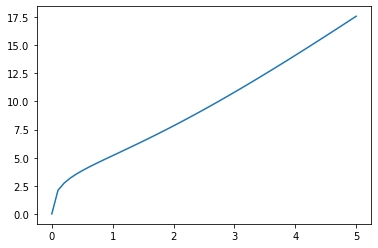

In [16]:
y_plot_ramh = [ramh_2(i) for i in x_plot]
plt.plot(x_plot, y_plot_ramh)

In [33]:
rel_h = lambda m: ramh_2(m)*m # unit kJ/kg_water

In [34]:
rel_h(5)

87.88658167617159

In [35]:
rel_h_new = lambda m: (L_A(m) + L_B(m))

In [36]:
rel_h_new(5)

17.57731633523432

In [37]:
# enthalpy and heat capacity of MgCl2 solid phase:
# Cp° = A + B*t + C*t2 + D*t3 + E/t2 ------ J/(mol*K)
# H° − H°298.15= A*t + B*t2/2 + C*t3/3 + D*t4/4 − E/t + F − H ---- kJ/mol

param_mgcl2_solid = [78.30733, 2.435888, 6.858873, -1.728967, -0.729911, -667.5823, 179.2639, -641.6164]
C_p_mgcl2_solid = lambda t: param_mgcl2_solid[0] +  param_mgcl2_solid[1]*t + param_mgcl2_solid[2]*t**2 + param_mgcl2_solid[3] * t**3 + param_mgcl2_solid[4]/(t**2)

h_mgcl2_solid = lambda t: param_mgcl2_solid[0] * t +  param_mgcl2_solid[1]*t**2/2 + param_mgcl2_solid[2]*t**3/3 + param_mgcl2_solid[3] * t**4/4 - param_mgcl2_solid[4]/(t)\
                + param_mgcl2_solid[5] - param_mgcl2_solid[7]

In [38]:
# enthalpy of solid mgcl2
h_mgcl2_solid_25 = h_mgcl2_solid(298.15/1000) - h_mgcl2_solid(273.15/1000)
h_mgcl2_solid_25

1.7640045389329089

In [39]:
# NBS Table
delta_f_h_c = -153.280
delta_f_h_unl = -191.48

delta_solution_unlimited = (delta_f_h_unl - delta_f_h_c) * 4.184
delta_solution_unlimited # reference value at 25°C

-159.82879999999997

In [40]:
delta_solution_unlimited = -155.82

In [41]:
h_water = lambda T: PropsSI('H','T',T,'Q',0, 'IF97::Water')/1000 #kJ/kg

In [42]:
h_0_ref_25 = lambda m: delta_solution_unlimited * m + h_water(298.15)

In [43]:
h_0_ref_25_with_solute = lambda m: delta_solution_unlimited * m + h_water(298.15) + m * h_mgcl2_solid_25

In [44]:
h_at_25 = lambda m: (h_0_ref_25(m) + rel_h(m))/(1+0.095211*m) # unit kJ/kg

In [45]:
h_at_25_mass_frac = lambda x: h_at_25(massfr_to_molal(x)) # unit kJ/kg

In [46]:
mol_delta_solution_unlimited = -155.82 # kJ/mol

In [47]:
mol_h_water = lambda m, T: h_water(T)/m # kJ/mol

In [48]:
mol_h_0_ref_25 = lambda m: mol_delta_solution_unlimited + mol_h_water(T=298.15, m=m) # kJ/mol

In [49]:
mol_h_0_ref_25(1)

-50.98161413725268

In [50]:
mol_h_at_25_new = lambda m: mol_h_0_ref_25(m) + rel_h_new(m) # kJ/mol

In [51]:
h_at_25_new = lambda m: mol_h_at_25_new(m)*m/(1+0.095211*m)

In [52]:
# h_at_25_new = lambda m: (h_0_ref_25(m) + rel_h_new(m))/(1+0.095211*m) # unit kJ/kg

In [53]:
h_at_25_mass_frac_new = lambda x: h_at_25_new(massfr_to_molal(x)) # unit kJ/kg

In [54]:
h_at_25_mass_frac_new(0.3)

-367.71995174663834

In [55]:
h_at_25_with_solute = lambda m: (h_0_ref_25_with_solute(m) + rel_h(m))/(1+0.095211*m) # unit kJ/kg

In [56]:
h_at_25_with_solute_mass_frac = lambda x: h_at_25_with_solute(massfr_to_molal(x)) # unit kJ/kg

In [57]:
# errornous methode
h_0_ref_25_2 = lambda m: delta_solution_unlimited + h_water(298.15)

In [58]:
h_at_25_2 = lambda m: (h_0_ref_25_2(m) + rel_h(m))/(1+0.095211*m) # unit kJ/kg

In [59]:
h_at_25_mass_frac_2 = lambda x: h_at_25_2(massfr_to_molal(x)) # unit kJ/kg

### x. Haltenburg

In [60]:
list_a = [2.78969, -0.1127879, 2.341368*10**-3, 1.527498*10**-5]

In [61]:
A = lambda x: list_a[0] + list_a[1]*x + list_a[2] * x**2 + list_a[3] * x**3

In [62]:
A(66)

9.936183258080003

# **II. Thermal property:** heat capacity, enthalpy

### 1. function for Cp (Koller)

In [63]:
# model for calculation heat capacity of water
para_wa = [88.7891, -120.1958, -16.9264, 52.4654, 0.10826, 0.46988]
cp_w = lambda theta: para_wa[0] + para_wa[1]*theta**0.02 + para_wa[2]*theta**0.04 + para_wa[3]*theta**0.06 + para_wa[4]*theta**1.8 + para_wa[5]*theta**8

In [64]:
cp_w(273.16/228-1)

4.1724281137388735

In [65]:
# correlation
cp_rel = lambda T,x: math.exp(1.148*x)+(-7.316-0.005528*T+T**0.3264)*x

In [66]:
cp = lambda T,x: cp_rel(T, x)*cp_w(theta=T/228-1)

In [67]:
cp(298.15, 0.247)

2.8995036729121186

### 2. function for differential enthalpy of dilution (Conde)

In [68]:
# the parameter for calcium_chloride was implemented
para_ca_h_d = [0.855, -1.965, -2.265, 0.8, -955.690, 3011.974]
delta_h_d0 = lambda theta: para_ca_h_d[4] + para_ca_h_d[5] * theta
zeta = lambda xi: xi/(para_ca_h_d[3] - xi)
delta_h_d = lambda xi, T: delta_h_d0(theta=T/647) * (1+(zeta(xi)/para_ca_h_d[0]) ** para_ca_h_d[1]) ** para_ca_h_d[2]

In [69]:
# differential enthalpy of dilution at certain temperature and concentration
delta_h_d(0.3, 333.15)

49.22219204414003

### 3. Calculation of heat difference between two solutions with different state

In [70]:
# simplified calculation of h: integration of Cp(T)dT
# function to get h from T and x  (enthalpy of dilution excluded...)
def get_h(xi, T_1, T_2):
    cp_T_ = lambda T: cp(T=T, x=xi)
    h = intg.quad(cp_T_, T_1, T_2)
    return h

In [71]:
# integration of the differential enthalpy of dilution to mass of water
def get_h_dil_integral_to_water(T, xi1, xi2):
    delta_h_d_ = lambda x: delta_h_d(T=T, xi=x)*(-x**-2)
    h_dil = intg.quad(delta_h_d_, xi1, xi2)
    return h_dil

In [72]:
# calculation of the heat change during the dilution process: delta Q = m_B * h_B - m_A * h_A
# the heat change consists of three terms: 
    # term 1 --> temperature change; 
    # term 2 --> energy of water added;
    # term 3 --> integral enthalpy of dilution

# return of the function, Q_0, is the normalized energy change, which is delta_Q / m_B = h_B - m_A/m_B * h_A

def get_Q(T_ref, T_2, T_1, xi2, xi1):
    # T_ref reference temperature
    # T_2 temperature of solution 2
    # T_1 temperature of solution 1
    
    if xi1 < xi2:
        xi1, xi2 = xi2, xi1
        T_1, T_2 = T_2, T_1  
        factor = -1
    else:
        factor = 1
    
    term_1 = get_h(xi=xi2, T_1=T_ref, T_2=T_2)[0] - xi2 / xi1 * get_h(xi=xi1, T_1=T_ref, T_2=T_1)[0]
    term_2 = (1 - xi2 / xi1)*(PropsSI('H','T',T_ref,'Q',0, 'IF97::Water')/1000) 
    term_3 = xi2 * get_h_dil_integral_to_water(T=T_ref, xi1=xi1, xi2=xi2)[0]
    # dt_h_dilution = (1 - xi2 / xi1)*(PropsSI('H','T',T_ref,'Q',0, 'IF97::Water')/1000 - get_h_dil_integral_to_x(T=T_ref, xi0=xi1, xi=xi2)[0])
    
    Q_0 = (term_1 + term_2 - term_3) * factor
    return Q_0, term_1, term_2 + term_3

In [ ]:
get_Q(T_ref=278.15, T_2=293.15, T_1=313.15, xi2=0.35, xi1=0.015)

In [ ]:
get_Q(273.151, 273.16, 293.15, 0.3, 0.001)

### 4. Calculate h with cp

In [73]:
h_at_25_mass_frac(0)

104.83838586274732

In [74]:
cp(298.15, 0.247)

2.8995036729121186

In [75]:
def get_h_with_cp_and_ref_25(T, x):
    h_ref_25 = h_at_25_mass_frac(x)
    intgral_cp = get_h(xi = x, T_1=298.15, T_2=T)[0]
    h = h_ref_25 + intgral_cp
    return h

In [76]:
get_h_with_cp_and_ref_25(313.15, 0.3)/4.184

-78.21506494540395

# **3. Validation**

### test for dynamic viscosity

### 0. Soluability

In [78]:
df_sol = pd.read_excel("./table/TCF/Validation_for_ZB.xlsx", sheet_name="Soluability")

In [79]:
df_sol

,Temperatur,exp,cal,error
0,-2.00,5.350579,5.503731,-0.028623
1,0.00,5.604742,5.543000,0.011016
2,0.00,NaN,5.543000,NaN
3,0.00,5.532108,5.543000,-0.001969
4,0.00,5.556627,5.543000,0.002452
...,...,...,...,...
231,110.40,8.172311,8.299161,-0.015522
232,114.10,8.544868,8.648190,-0.012092
233,114.32,8.579476,8.670972,-0.010665
234,115.00,8.593354,8.742935,-0.017407


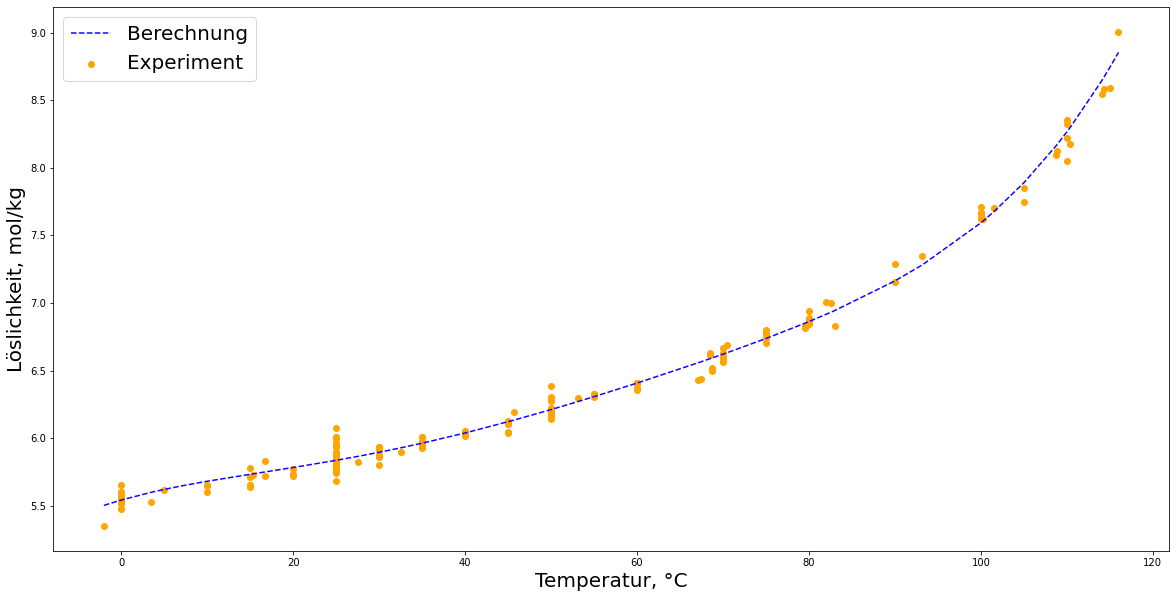

In [80]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(df_sol.Temperatur, df_sol.exp, label = "Experiment", color = "orange")
ax.plot(df_sol.Temperatur, df_sol.cal, label = "Berechnung", color = "#0f03fc", linestyle='dashed')

ax.set_xlabel("Temperatur, °C", size = 20)
ax.set_ylabel("Löslichkeit, mol/kg", size = 20)
ax.legend(fontsize = 20)

# plt.savefig('validation_mgcl2_soluability.png', dpi=300, transparent=True)

### 0. vapor pressure

In [81]:
df_vp = pd.read_excel("./table/TCF/Validation_for_ZB.xlsx", sheet_name="vapor_pressure")

In [82]:
df_vp

,Molality,exp 303,sim 303,exp 313,sim 313,exp 323,sim 323,exp 333,sim 333,exp 343,sim 343
0,(molality) m (mol/kg),Vapor Pressure (kPa),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,303.15,NaN,313.15,NaN,323.15,NaN,333.15,NaN,343.15,NaN
2,NaN,exp 303,sim 303,exp 313,sim 313,exp 323,sim 323,exp 333,sim 333,exp 343,sim 343
3,1.047,3.98,4.0696,6.94,7.09,11.63,11.88,18.8,19.22,29.45,30.12
4,1.303,3.85,3.97,6.74,6.92,11.31,11.6,18.35,18.78,28.8,29.45
5,2.006,3.6,3.62,6.29,6.33,10.57,10.62,17.17,17.22,26.91,27.07
6,2.449,3.33,3.37,5.86,5.89,9.87,9.9,16.04,16.08,25.33,25.29
7,3.167,2.98,2.93,5.22,5.13,8.81,8.66,14.32,14.09,22.51,22.2
8,3.737,2.74,2.59,4.8,4.54,8.07,7.67,13.08,12.5,20.59,19.74
9,4.343,2.32,2.24,4.09,3.94,6.93,6.67,11.33,10.89,17.91,17.23


In [83]:
df_vp_data = df_vp.iloc[3:,:]
df_vp_data

,Molality,exp 303,sim 303,exp 313,sim 313,exp 323,sim 323,exp 333,sim 333,exp 343,sim 343
3,1.047,3.98,4.0696,6.94,7.09,11.63,11.88,18.8,19.22,29.45,30.12
4,1.303,3.85,3.97,6.74,6.92,11.31,11.6,18.35,18.78,28.8,29.45
5,2.006,3.6,3.62,6.29,6.33,10.57,10.62,17.17,17.22,26.91,27.07
6,2.449,3.33,3.37,5.86,5.89,9.87,9.9,16.04,16.08,25.33,25.29
7,3.167,2.98,2.93,5.22,5.13,8.81,8.66,14.32,14.09,22.51,22.2
8,3.737,2.74,2.59,4.8,4.54,8.07,7.67,13.08,12.5,20.59,19.74
9,4.343,2.32,2.24,4.09,3.94,6.93,6.67,11.33,10.89,17.91,17.23
10,4.801,1.99,1.996,3.52,3.52,6.04,5.96,9.93,9.75,15.77,15.45


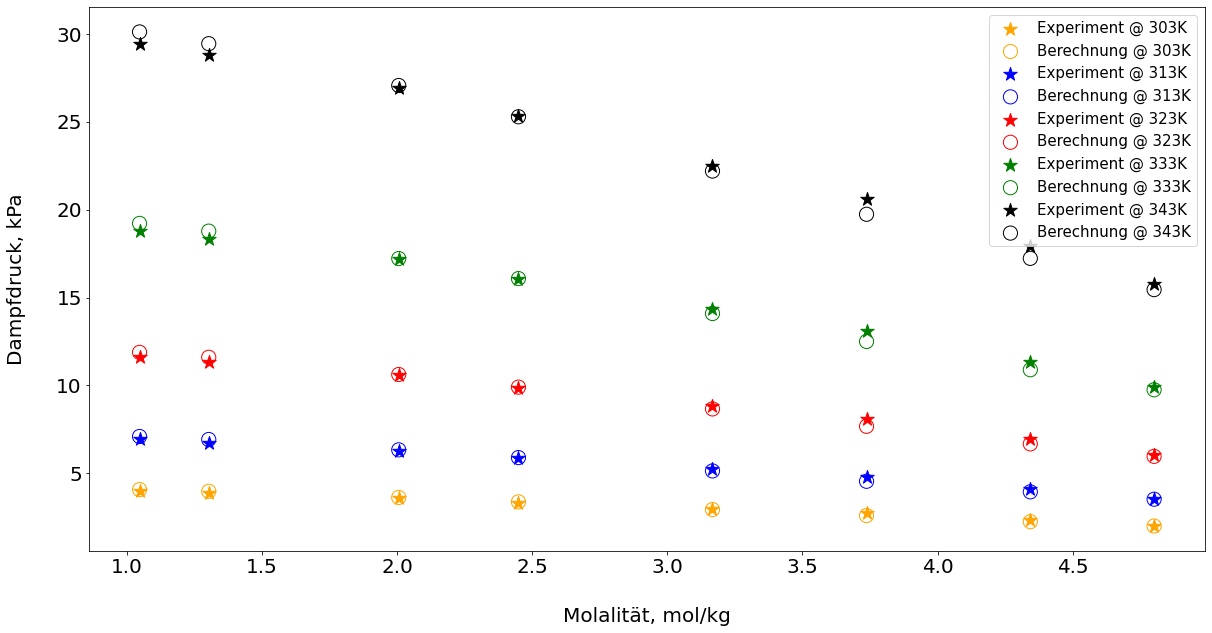

In [84]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(df_vp_data.Molality, df_vp_data["exp 303"], label = "Experiment @ 303K", color = "orange", marker = "*", s = 200)
ax.scatter(df_vp_data.Molality, df_vp_data["sim 303"], label = "Berechnung @ 303K", facecolors = "none", color = "orange", marker = "o", s = 200)

ax.scatter(df_vp_data.Molality, df_vp_data["exp 313"], label = "Experiment @ 313K", color = "blue", marker = "*", s = 200)
ax.scatter(df_vp_data.Molality, df_vp_data["sim 313"], label = "Berechnung @ 313K", facecolors = "none", color = "blue", marker = "o", s = 200)

ax.scatter(df_vp_data.Molality, df_vp_data["exp 323"], label = "Experiment @ 323K", color = "red", marker = "*", s = 200)
ax.scatter(df_vp_data.Molality, df_vp_data["sim 323"], label = "Berechnung @ 323K", facecolors = "none", color = "red", marker = "o", s = 200)

ax.scatter(df_vp_data.Molality, df_vp_data["exp 333"], label = "Experiment @ 333K", color = "green", marker = "*", s = 200)
ax.scatter(df_vp_data.Molality, df_vp_data["sim 333"], label = "Berechnung @ 333K", facecolors = "none", color = "green", marker = "o", s = 200)

ax.scatter(df_vp_data.Molality, df_vp_data["exp 343"], label = "Experiment @ 343K", color = "black", marker = "*", s = 200)
ax.scatter(df_vp_data.Molality, df_vp_data["sim 343"], label = "Berechnung @ 343K", facecolors = "none", color = "black", marker = "o", s = 200)

ax.set_xlabel("Molalität, mol/kg", size = 20, labelpad = 30)
ax.set_ylabel("Dampfdruck, kPa", size = 20, labelpad = 30)
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 20)

# plt.savefig('validation_mgcl2_pressure.png', dpi=300, transparent=True)

### 0. density

In [85]:
df_dens = pd.read_excel("./table/TCF/Validation_for_ZB.xlsx", sheet_name="density")

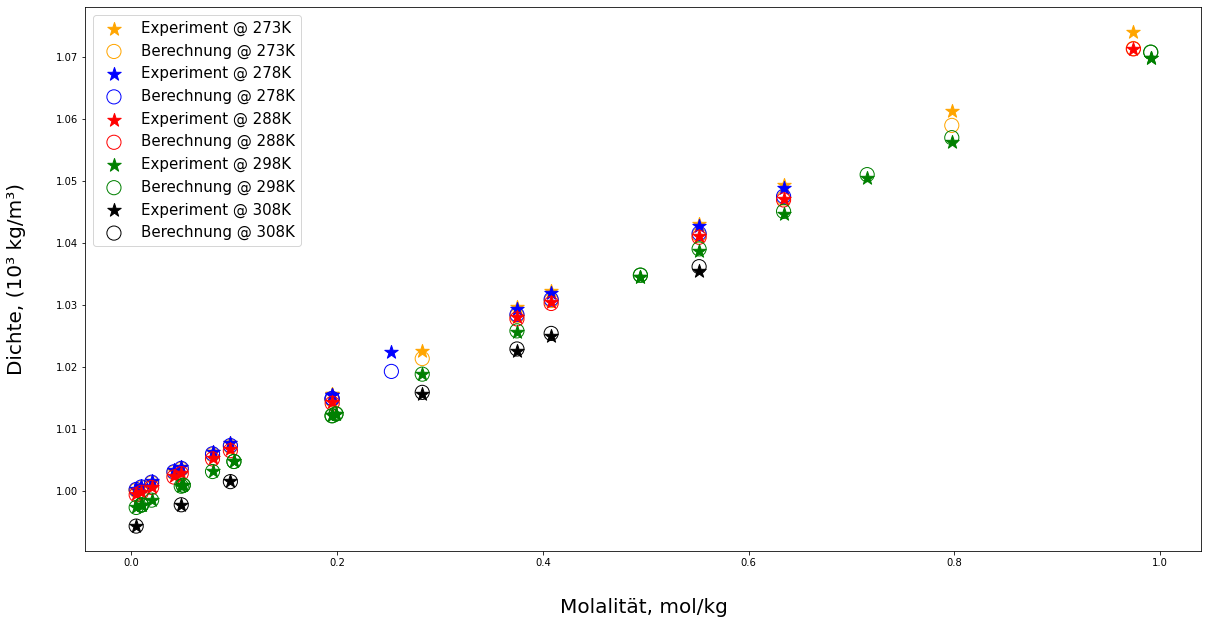

In [87]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(df_dens.Molality_0.dropna(), df_dens["d_exp_0"].dropna(), label = "Experiment @ 273K", color = "orange", s = 200, marker = "*")
ax.scatter(df_dens.Molality_0.dropna(), df_dens["d_sim_0"].dropna(), label = "Berechnung @ 273K", color = "orange", facecolor = "none", s = 200, marker = "o")

ax.scatter(df_dens.Molality_5.dropna(), df_dens["d_exp_5"].dropna(), label = "Experiment @ 278K", color = "blue", s = 200, marker = "*")
ax.scatter(df_dens.Molality_5.dropna(), df_dens["d_sim_5"].dropna(), label = "Berechnung @ 278K", color = "blue", facecolor = "none", s = 200, marker = "o")

ax.scatter(df_dens.Molality_15.dropna(), df_dens["d_exp_15"].dropna(), label = "Experiment @ 288K", color = "red", s = 200, marker = "*")
ax.scatter(df_dens.Molality_15.dropna(), df_dens["d_sim_15"].dropna(), label = "Berechnung @ 288K", color = "red", facecolor = "none", s = 200, marker = "o")

ax.scatter(df_dens.Molality_25.dropna(), df_dens["d_exp_25"].dropna(), label = "Experiment @ 298K", color = "green", s = 200,  marker = "*")
ax.scatter(df_dens.Molality_25.dropna(), df_dens["d_sim_25"].dropna(), label = "Berechnung @ 298K", color = "green", facecolor = "none", s = 200, marker = "o")

ax.scatter(df_dens.Molality_35.dropna(), df_dens["d_exp_35"].dropna(), label = "Experiment @ 308K", color = "black", s = 200,  marker = "*")
ax.scatter(df_dens.Molality_35.dropna(), df_dens["d_sim_35"].dropna(), label = "Berechnung @ 308K", color = "black", facecolor = "none", s = 200,   marker = "o")

ax.set_xlabel("Molalität, mol/kg", size = 20, labelpad = 30)
ax.set_ylabel("Dichte, (10³ kg/m³)", size = 20, labelpad = 30)
ax.legend(fontsize = 15)

# plt.savefig('validation_mgcl2_density.png', dpi=300, transparent=True)

### 1. Validation for Cp

In [88]:
# reference data of cp from literature
df_ref = pd.read_excel("./table/TCF/3_cp.xlsx", sheet_name="3")

In [89]:
# plot for validation
x_solution = np.linspace(0.02, 0.36, 18)

y_00 = [cp(273.15, i) for i in x_solution]
y_10 = [cp(283.15, i) for i in x_solution]
y_20 = [cp(293.15, i) for i in x_solution]
y_30 = [cp(303.15, i) for i in x_solution]
y_40 = [cp(313.15, i) for i in x_solution]
y_50 = [cp(323.15, i) for i in x_solution]
y_60 = [cp(333.15, i) for i in x_solution]

df_ref['00_sim'] = y_00
df_ref['10_sim'] = y_10
df_ref['20_sim'] = y_20
df_ref['30_sim'] = y_30
df_ref['40_sim'] = y_40
df_ref['50_sim'] = y_50
df_ref['60_sim'] = y_60

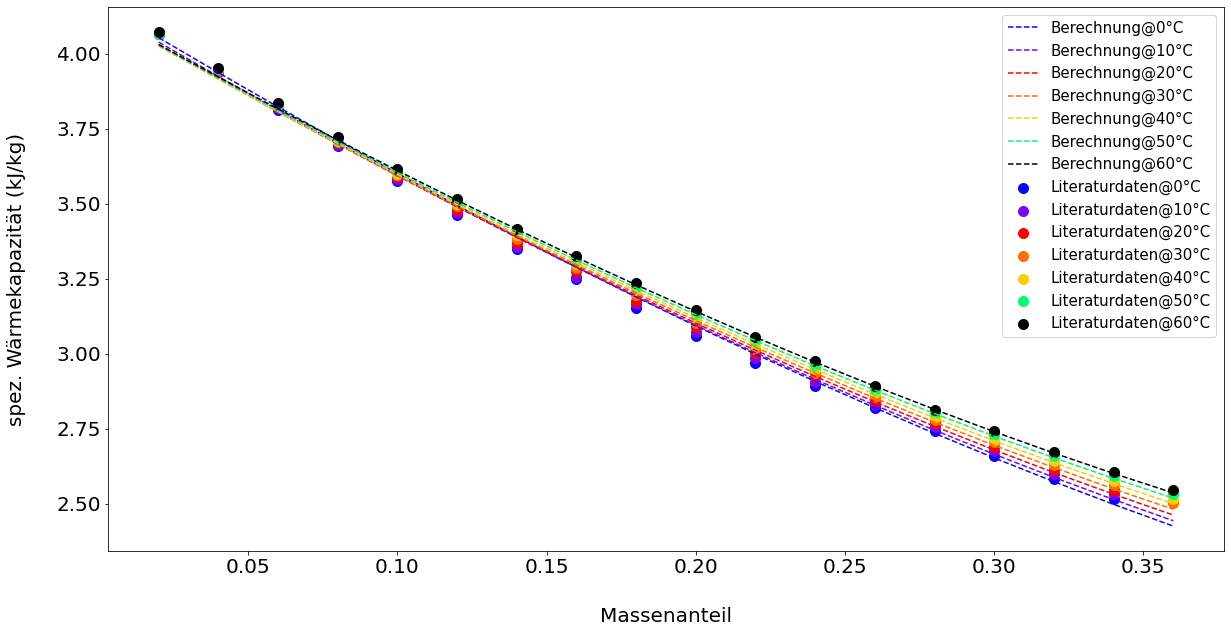

In [90]:
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_solution, df_ref[0]/1000, label = "Literaturdaten@0°C", marker = "o", s = 100, color = "#0f03fc")
ax.plot(x_solution, df_ref['00_sim'], label = "Berechnung@0°C", color = "#0f03fc", linestyle='dashed')

ax.scatter(x_solution, df_ref[10]/1000, label = "Literaturdaten@10°C", marker = "o", s = 100,  color = "#7b03fc")
ax.plot(x_solution, df_ref['10_sim'], label = "Berechnung@10°C", color = "#7b03fc", linestyle='dashed')

ax.scatter(x_solution, df_ref[20]/1000, label = "Literaturdaten@20°C", marker = "o", s = 100,  color = "red")
ax.plot(x_solution, df_ref['20_sim'], label = "Berechnung@20°C", color = "red", linestyle='dashed')

ax.scatter(x_solution, df_ref[30]/1000, label = "Literaturdaten@30°C", marker = "o", s = 100,  color = "#fc6f03")
ax.plot(x_solution, df_ref['30_sim'], label = "Berechnung@30°C", color = "#fc6f03", linestyle='dashed')

ax.scatter(x_solution, df_ref[40]/1000, label = "Literaturdaten@40°C", marker = "o", s = 100,  color = "#fcce03")
ax.plot(x_solution, df_ref['40_sim'], label = "Berechnung@40°C", color = "#fcce03", linestyle='dashed')

ax.scatter(x_solution, df_ref[50]/1000, label = "Literaturdaten@50°C", marker = "o", s = 100,  color = "#03fc6f")
ax.plot(x_solution, df_ref['50_sim'], label = "Berechnung@50°C", color = "#03fc6f", linestyle='dashed')

ax.scatter(x_solution, df_ref[60]/1000, label = "Literaturdaten@60°C", marker = "o", s = 100,  color = "black")
ax.plot(x_solution, df_ref['60_sim'], label = "Berechnung@60°C", color = "black", linestyle='dashed')

ax.set_xlabel("Massenanteil", size = 20, labelpad = 30)
ax.set_ylabel("spez. Wärmekapazität (kJ/kg)", size = 20, labelpad = 30)

# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize = 15)
ax.tick_params(labelsize = 20)
# plt.savefig('validation_mgcl2_cp.png', dpi=300, transparent=False)

In [24]:
df_ref_reverse = df_ref.drop(columns=["molality"]).set_index("mass fraction").T

In [25]:
RMSRE(ref=df_ref_reverse.head(7)[0.3]/1000, sim=df_ref_reverse.tail(7)[0.3])

0.00264082647864949

### 2. Validation for enthalpy

#### step 1: get reference: interpolation and fitting of merkel-diagramm

In [91]:
df = pd.read_excel("./table/TCF/data from merkel.xlsx", sheet_name="MgCl2")
df.head()

,x00,i00,x20,i20,x40,i40,x60,i60
0,0.000366,0.836361,0.000645,20.501283,0.000094,39.958041,0.000369,59.413762
1,0.001187,0.416921,0.010497,15.886406,0.003385,38.907885,0.003654,57.945204
2,0.003648,-0.841399,0.016249,13.577930,0.005026,38.069005,0.006936,56.267444
3,0.005289,-1.680279,0.019534,12.109372,0.007493,37.229088,0.011045,54.588647
4,0.007757,-2.520196,0.022001,11.269454,0.009958,36.179969,0.015974,52.490409


In [92]:
# transfer columns of dataframe to list
x_60 = df["x60"].dropna().tolist()
y_60 = df["i60"].dropna().tolist()

y_40 = df["i40"].dropna().tolist()
x_40 = df["x40"].dropna().tolist()

y_20 = df["i20"].dropna().tolist()
x_20 = df["x20"].dropna().tolist()

x_00 = df["x00"].dropna().tolist()
y_00 = df["i00"].dropna().tolist()

x_25 = np.linspace(0, 0.6, num = 20, endpoint = True)#x_20
y_25 = [h_at_25_mass_frac(i)/4.184 for i in x_25]

# y_25_2 = [h_at_25_mass_frac_2(i)/4.184 for i in x_25]

# y_25_3 = [h_at_25_with_solute_mass_frac(i)/4.184 for i in x_25]

# y_25_new = [h_at_25_mass_frac_new(i)/4.184 for i in x_25]

In [93]:
# fit data into polynorm
z_60 = np.polyfit(x_60, y_60, 5, full=True)
z_40 = np.polyfit(x_40, y_40, 5, full=True)
z_20 = np.polyfit(x_20, y_20, 5, full=True)
z_00 = np.polyfit(x_00, y_00, 3, full=True)

In [94]:
# convert polynorm to callable functions
p_60 = np.poly1d(z_60[0])
p_40 = np.poly1d(z_40[0])
p_20 = np.poly1d(z_20[0])
p_00 = np.poly1d(z_00[0])

In [95]:
# generate a dict for later use
dict_integ_func = {'t20':p_20, 't40':p_40, 't60':p_60, 't0':p_00}

Text(0, 0.5, 'Enthalpie (kJ/kg)')

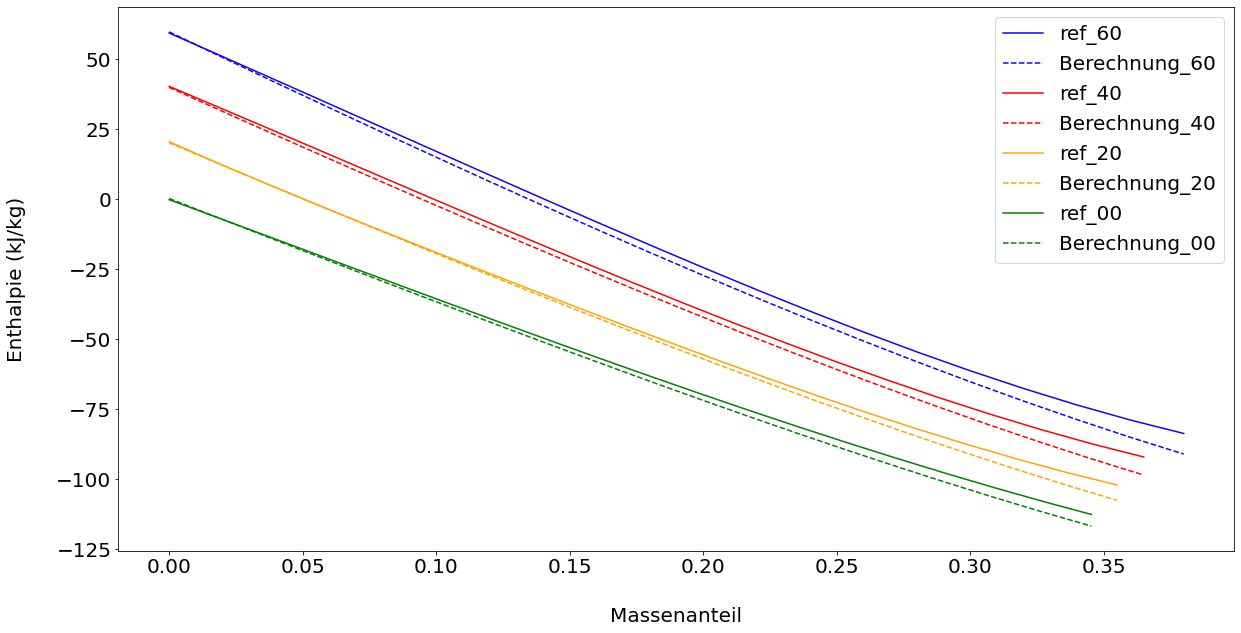

In [96]:
# plot
fig, ax = plt.subplots(figsize=(20,10))

# 60
x_60_new = np.linspace(0, 0.38, num = 20, endpoint = True)
y_60_new = p_60(x_60_new)

y_60_2 = [get_h_with_cp_and_ref_25(333.15, i)/4.184 for i in x_60_new]

# 40
x_40_new = np.linspace(0, 0.365, num = 20, endpoint = True)
y_40_new = p_40(x_40_new)

y_40_2 = [get_h_with_cp_and_ref_25(313.15, i)/4.184 for i in x_40_new]

# 20
x_20_new = np.linspace(0, 0.355, num = 20, endpoint = True)
y_20_new = p_20(x_20_new)

y_20_2 = [get_h_with_cp_and_ref_25(293.15, i)/4.184 for i in x_20_new]

# 0
x_00_new = np.linspace(0, 0.3454, num = 20, endpoint = True)
y_00_new = p_00(x_00_new)

y_00_2 = [get_h_with_cp_and_ref_25(273.15, i)/4.184 for i in x_00_new]


ax.plot(x_60_new, y_60_new, label = "ref_60", color = "#0f03fc")
ax.plot(x_60_new, y_60_2, label = "Berechnung_60", color = "#0f03fc", linestyle='dashed')

ax.plot(x_40_new, y_40_new, label = "ref_40", color = "red")
ax.plot(x_40_new, y_40_2, label = "Berechnung_40", color = "red", linestyle='dashed')

ax.plot(x_20_new, y_20_new, label = "ref_20", color = "orange")
ax.plot(x_20_new, y_20_2, label = "Berechnung_20", color = "orange", linestyle='dashed')

ax.plot(x_00_new, y_00_new, label = "ref_00", color = "green")
ax.plot(x_00_new, y_00_2, label = "Berechnung_00", color = "green", linestyle='dashed')

ax.tick_params(labelsize = 20)
# plt.plot(x_25, y_25, 'o')
# # plt.plot(x_25, y_25_2, '--') # --> calculation of reference state with considering the molality (always 1 mol/kg_water)
# # plt.plot(x_25, y_25_3, "*")
# # plt.plot(x_25, y_25_new, '*')

plt.legend(fontsize = 20)

ax.set_xlabel("Massenanteil", size = 20, labelpad = 30)
ax.set_ylabel("Enthalpie (kJ/kg)", size = 20, labelpad = 30)

# plt.show()
# plt.savefig('validation_mgcl2_h.png', dpi=300, transparent=True)

In [ ]:
# use fitted polynom-function to calculate the heat change during the dilution process: delta_Q/m_B = h_B - x_B/x_A*h_A

def get_Q_interp(T_1, T_2, xi1, xi2):
    
    if xi1 < xi2:
        xi1, xi2 = xi2, xi1
        T_1, T_2 = T_2, T_1  
        factor = -1
    else:
        factor = 1
    
    str_temp1 = 't'+ str(int(T_1-273.15))
    str_temp2 = 't'+ str(int(T_2-273.15))
    try:
        selected_func1 = dict_integ_func[str_temp1]
        selected_func2 = dict_integ_func[str_temp2]
    except:
        print("the temperature of interpolation could only be 0, 20, 40, 60")
    delta_Q = (selected_func2(xi2) - xi2/xi1*selected_func1(xi1))*4.184*factor
    return delta_Q

In [ ]:
# generate data for plot


xi2_end = 0.3
x_Q_validation = np.linspace(xi2_end+0.0001, 0.35, num = 50, endpoint = True)



y_Q_interp_0 = [get_Q_interp(T_1=273.15, T_2 = 273.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_0_0 = [get_Q(T_ref=278.15, T_2=273.15, T_1 = 273.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_20 = [get_Q_interp(T_1=293.15, T_2 = 293.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_20_0 = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_40 = [get_Q_interp(T_1=313.15, T_2 = 313.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_40_0 = [get_Q(T_ref=278.15, T_2=313.15, T_1 = 313.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_60 = [get_Q_interp(T_1=333.15, T_2 = 333.15 , xi2= 0.015, xi1=i) for i in x_Q_validation]
y_Q_function_60_0 = [get_Q(T_ref=278.15, T_2=333.15, T_1 = 333.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]
y_h_60 = [p_60(i)*4.184 for i in x_Q_validation]

y_Q_interp_60_2 = [get_Q_interp(T_1=333.15, T_2 = 333.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_60_0_2 = [get_Q(T_ref=278.15, T_2=333.15, T_1 = 333.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_40_60 = [get_Q_interp(T_1=313.15, T_2 = 333.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_40_60_0 = [get_Q(T_ref=278.15, T_2=333.15, T_1 = 313.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_60_40 = [get_Q_interp(T_1=333.15, T_2 = 313.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_60_40_0 = [get_Q(T_ref=278.15, T_2=313.15, T_1 = 333.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_60_20 = [get_Q_interp(T_1=333.15, T_2 = 293.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_60_20_0 = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 333.15, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

y_Q_interp_00_20 = [get_Q_interp(T_1=273.15, T_2 = 293.15 , xi2= xi2_end, xi1=i) for i in x_Q_validation]
y_Q_function_00_20_0 = [get_Q(T_ref=273.16, T_2=293.15, T_1 = 273.16, xi1=i, xi2=xi2_end)[0] for i in x_Q_validation]

# large deviation at opposite concentration (which means not diltion, but concentration...)
# y_Q_interp_60_20_op = [get_Q_interp(T_1=333.15, T_2 = 293.15 , xi1= 0.015, xi2=i) for i in x_Q_validation]
# y_Q_function_60_20_0_op = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 333.15, xi2=i, xi1=0.015)[0] for i in x_Q_validation]

In [ ]:
# plot

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(x_Q_validation, y_Q_interp_40_60, label = "ref_40_60_x_0.015", color = "#0f03fc")
ax.plot(x_Q_validation, y_Q_function_40_60_0, label = "cal_40_60_x_0.015", color = "#0f03fc", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_60_2, label = "ref_60_x_0.005", color = "#7b03fc")
ax.plot(x_Q_validation, y_Q_function_60_0_2, label = "cal_60_x_0.005", color = "#7b03fc", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_60, label = "ref_60_x_0.015", color = "red")
ax.plot(x_Q_validation, y_Q_function_60_0, label = "cal_60_x_0.015", color = "red", linestyle='dashed')
ax.plot(x_Q_validation, y_h_60, label = "h_60", color = "red", linestyle = "dashdot")

ax.plot(x_Q_validation, y_Q_interp_40, label = "ref_40_x_0.015", color = "#fc6f03")
ax.plot(x_Q_validation, y_Q_function_40_0, label = "cal_40_x_0.015", color = "#fc6f03", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_20, label = "ref_20_x_0.015", color = "#fcce03")
ax.plot(x_Q_validation, y_Q_function_20_0, label = "cal_20_x_0.015", color = "#fcce03", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_00_20, label = "ref_00_20_x_0.015", color = "black")
ax.plot(x_Q_validation, y_Q_function_00_20_0, label = "cal_00_20_x_0.015", color = "black", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_60_40, label = "ref_60_40_x_0.015", color = "#42ecf5")
ax.plot(x_Q_validation, y_Q_function_60_40_0, label = "cal_60_40_x_0.015", color = "#42ecf5", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_60_20, label = "ref_60_20_x_0.015", color = "#2c821f")
ax.plot(x_Q_validation, y_Q_function_60_20_0, label = "cal_60_20_x_0.015", color = "#2c821f", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_60_20_op, label = "ref_60_20_x_0.015", color = "#7a0000")
ax.plot(x_Q_validation, y_Q_function_60_20_0_op, label = "cal_60_20_x_0.015", color = "#7a0000", linestyle='dashed')

ax.plot(x_Q_validation, y_Q_interp_0, label = "ref_0_x_0.015", color = "#03fc6f")
ax.plot(x_Q_validation, y_Q_function_0_0, label = "cal_0_x_0.015", color = "#03fc6f", linestyle='dashed')

ax.set_xlabel("start mass fraction of concentrated solution", size = 20)
ax.set_ylabel("h2-x2/x1*h1 (kJ/kg)", size = 20)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

# plt.savefig('validation_interp_integ_MgCl2.png', dpi=300, transparent=True)

In [ ]:
RMSRE(ref=y_Q_interp_00_20, sim=y_Q_function_00_20_0)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

x_Q_validation = np.linspace(0.301, 0.35, num = 50, endpoint = True)

y_Q_interp_20 = [get_Q_interp(T_1=293.15, T_2 = 293.15 , xi2= 0.3, xi1=i) for i in x_Q_validation]
y_Q_function_20_0 = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.3)[0] for i in x_Q_validation]

ax.plot(x_Q_validation, y_Q_interp_20, label = "ref_20_x_0.2", color = "#fcce03")
ax.plot(x_Q_validation, y_Q_function_20_0, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashed')

plt.show()

# **Miscellaneous**

##### **test get-Q function**

In [ ]:
get_Q(T_ref=273.155, T_1=273.16, T_2 = 273.16, xi1=0.00011, xi2=0.00010)[0] + get_Q(T_ref=273.155, T_1=273.16, T_2 = 293.16, xi1=0.00011, xi2=0.2)[0]

In [ ]:
get_Q(T_ref=273.16, T_1=293.15, T_2 = 273.16, xi1=0.2, xi2=0.00011)[0]

##### **try to calculate h from delta_h_dil**

In [ ]:
def get_h_abs(T0, x0, T, x):
    term_intg = get_h(xi = x, T_1=T0, T_2=T)[0]
    term_water = PropsSI('H','T',T0,'Q',0, 'IF97::Water')/1000
    term_dil = x*get_h_dil_integral_to_water(T=T0, xi1=x0, xi2=x)[0]
    h = term_intg + term_water - term_dil
    return h

In [ ]:
get_h_abs(T0=273.25, x0=0.0001, T = 293.15, x=0.1)#-p_20(0.1)*4.184

In [ ]:
get_h_abs(T0=273.25, x0=0.0001, T = 293.15, x=0.2)-p_20(0.2)*4.184

In [ ]:
get_h_abs(T0=273.25, x0=0.0001, T = 293.15, x=0.3)-p_20(0.3)*4.184

In [ ]:
p_20(0.3)

In [ ]:
get_h_abs(T0=273.25, x0=0.0001, T = 293.15, x=0.1) - 0.1/0.3*get_h_abs(T0=273.25, x0=0.0001, T = 293.15, x=0.3)

In [ ]:
get_Q_interp(293.15, 293.15, xi1 = 0.3, xi2 = 0.1)

##### **find the reason of deviation**

In [ ]:
# use fitted polynom-function to calculate the heat change during the dilution process: delta_Q/m_B = h_B - x_B/x_A*h_A

def get_Q_interp_2(T_1, T_2, xi1, xi2):
    
    if xi1 < xi2:
        xi1, xi2 = xi2, xi1
        T_1, T_2 = T_2, T_1  
        factor = -1
    else:
        factor = 1
    
    str_temp1 = 't'+ str(int(T_1-273.15))
    str_temp2 = 't'+ str(int(T_2-273.15))
    try:
        selected_func1 = dict_integ_func[str_temp1]
        selected_func2 = dict_integ_func[str_temp2]
    except:
        print("the temperature of interpolation could only be 0, 20, 40, 60")
    delta_Q = (selected_func2(xi2) - xi2/xi1*selected_func1(xi1))*4.184*factor
    return delta_Q, selected_func2(xi2)* 4.184, xi2/xi1*selected_func1(xi1)*4.184

In [ ]:
# energy change of diluting until relativ high concentration
fig, ax = plt.subplots(figsize=(20,10))

x_Q_validation = np.linspace(0.201, 0.35, num = 50, endpoint = True)

y_Q_interp_20_0 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.2, xi1=i)[0] for i in x_Q_validation]
y_Q_interp_20_1 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.2, xi1=i)[1] for i in x_Q_validation]
y_Q_interp_20_2 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.2, xi1=i)[2] for i in x_Q_validation]
# y_Q_function_20_0 = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.3)[0] for i in x_Q_validation]

# ax.plot(x_Q_validation, y_Q_interp_20_0, label = "ref_20_x_0.2", color = "#fcce03")
ax.plot(x_Q_validation, y_Q_interp_20_1, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashed')
ax.plot(x_Q_validation, y_Q_interp_20_2, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashdot')

plt.show()

In [ ]:
# energy change of diluting until very low concentration
fig, ax = plt.subplots(figsize=(20,10))

x_Q_validation = np.linspace(0.101, 0.35, num = 50, endpoint = True)

y_Q_interp_20_0 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.1, xi1=i)[0] for i in x_Q_validation]
y_Q_interp_20_1 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.1, xi1=i)[1] for i in x_Q_validation]
y_Q_interp_20_2 = [get_Q_interp_2(T_1=293.15, T_2 = 293.15 , xi2= 0.1, xi1=i)[2] for i in x_Q_validation]
# y_Q_function_20_0 = [get_Q(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.3)[0] for i in x_Q_validation]

ax.plot(x_Q_validation, y_Q_interp_20_0, label = "ref_20_x_0.2", color = "#fcce03")
ax.plot(x_Q_validation, y_Q_interp_20_1, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashed')
ax.plot(x_Q_validation, y_Q_interp_20_2, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashdot')

plt.show()

In [ ]:
def get_Q_2(T_ref, T_2, T_1, xi2, xi1):
    # T_ref reference temperature
    # T_2 temperature of solution 2
    # T_1 temperature of solution 1
    
    if xi1 < xi2:
        xi1, xi2 = xi2, xi1
        T_1, T_2 = T_2, T_1  
        factor = -1
    else:
        factor = 1
    
    term_1 = get_h(xi=xi2, T_1=T_ref, T_2=T_2)[0] - xi2 / xi1 * get_h(xi=xi1, T_1=T_ref, T_2=T_1)[0]
    term_2 = (1 - xi2 / xi1)*(PropsSI('H','T',T_ref,'Q',0, 'IF97::Water')/1000) 
    term_3 = xi2 * get_h_dil_integral_to_water(T=T_ref, xi1=xi1, xi2=xi2)[0]
    # dt_h_dilution = (1 - xi2 / xi1)*(PropsSI('H','T',T_ref,'Q',0, 'IF97::Water')/1000 - get_h_dil_integral_to_x(T=T_ref, xi0=xi1, xi=xi2)[0])
    
    Q_0 = (term_1 + term_2 - term_3) * factor
    return Q_0, term_1, term_2 - term_3

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

x_Q_validation = np.linspace(0.101, 0.35, num = 50, endpoint = True)

y_Q_function_20_0 = [get_Q_2(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.1)[0] for i in x_Q_validation]
y_Q_function_20_1 = [get_Q_2(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.1)[1] for i in x_Q_validation]
y_Q_function_20_2 = [get_Q_2(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.1)[2] for i in x_Q_validation]
# y_Q_function_20_3 = [get_Q_2(T_ref=278.15, T_2=293.15, T_1 = 293.15, xi1=i, xi2=0.3)[3] for i in x_Q_validation]


ax.plot(x_Q_validation, y_Q_function_20_0, label = "ref_20_x_0.2", color = "#fcce03")
ax.plot(x_Q_validation, y_Q_function_20_1, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashed')
ax.plot(x_Q_validation, y_Q_function_20_2, label = "cal_20_x_0.2", color = "#fcce03", linestyle='dashdot')
# ax.plot(x_Q_validation, y_Q_interp_20_3, label = "cal_20_x_0.2", color = "#fcce03", linestyle='solid')

plt.show()